In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = [14, 8]
import requests
from lxml import html
import pandas as pd 
import re

#################################################
# Scraping of related MRT/LRT stations details #
################################################

removeWords = set(['\n', 'Reserved station', 'N/A', 'Reserved Station', '[a]'])

In [2]:
## Scraping North South Line stations from wiki page using xPath
allStn=requests.get('https://en.wikipedia.org/wiki/List_of_Singapore_MRT_stations')
allStnTree = html.fromstring(allStn.content)
allStnName = allStnTree.xpath('//table[@class="wikitable"]//td[2]//text()')
allStnName.pop(allStnName.index('[a]'))
allStnName.pop(allStnName.index('Canberra'))

startingXpath = '//table[@class="wikitable"]//tr[3]//text()'
startingXpath = int(re.search(r'[0-9]+', startingXpath)[0])

endingXpath = '//table[@class="wikitable"]//tr[32]//text()'
endingXpath = int(re.search(r'[0-9]+', endingXpath)[0])

redEndPos = endingXpath - startingXpath - 1

redStnName = allStnName[:redEndPos]
redStnName = list(filter(lambda x: x not in removeWords, redStnName))

nsl_df = pd.DataFrame(redStnName, columns=['Name'])
nsl_df['Line'] = 'NSL'
nsl_df.head()

,Name,Line
0,Jurong East,NSL
1,Bukit Batok,NSL
2,Bukit Gombak,NSL
3,Choa Chu Kang,NSL
4,Yew Tee,NSL


In [3]:
## Scraping East West Line stations from wiki page using xPath
startingXpath = '//table[@class="wikitable"]//tr[32]//text()'
startingXpath = int(re.search(r'[0-9]+', startingXpath)[0])

endingXpath = '//table[@class="wikitable"]//tr[66]//text()'
endingXpath = int(re.search(r'[0-9]+', endingXpath)[0])

greenPos = endingXpath - startingXpath - 1
greenEndPos = redEndPos + greenPos

greenStnName = allStnName[redEndPos:greenEndPos]
greenStnName = list(filter(lambda x: x not in removeWords, greenStnName))

ewl_df = pd.DataFrame(greenStnName, columns=['Name'])
ewl_df['Line'] = 'EWL'
ewl_df.head()

,Name,Line
0,Tampines,EWL
1,Simei,EWL
2,Tanah Merah,EWL
3,Bedok,EWL
4,Kembangan,EWL


In [4]:
## Scraping Changi Airport Line stations from wiki page using xPath
startingXpath = '//table[@class="wikitable"]//tr[66]//text()'
startingXpath = int(re.search(r'[0-9]+', startingXpath)[0])

endingXpath = '//table[@class="wikitable"]//tr[69]//text()' 
endingXpath = int(re.search(r'[0-9]+', endingXpath)[0])

airportPos = endingXpath - startingXpath - 1

airportStnName = ['Tanah Merah']
airportStnName += allStnName[greenEndPos:greenEndPos+airportPos]
airportStnName = list(filter(lambda x: x not in removeWords, airportStnName))

cgl_df = pd.DataFrame(airportStnName, columns=['Name'])
cgl_df['Line'] = 'CGL'
cgl_df.head()

,Name,Line
0,Tanah Merah,CGL
1,Changi Airport,CGL
2,HarbourFront,CGL


In [5]:
## Adding Changi Airport Line to East West Line dataframe
ewl_df1 = ewl_df.iloc[4:]

cgl_df1 = cgl_df.reindex(index=cgl_df.index[::-1])

ewl_df2 = pd.concat([cgl_df1, ewl_df1])
ewl_df2.reset_index(drop=True,inplace=True)

airportStnName = ewl_df2['Name'].tolist()

In [6]:
## Scraping Circle Line stations from wiki page using xPath
startingXpath = '//table[@class="wikitable"]//tr[89]//text()'
startingXpath = int(re.search(r'[0-9]+', startingXpath)[0])

endingXpath = '//table[@class="wikitable"]//tr[119]//text()' 
endingXpath = int(re.search(r'[0-9]+', endingXpath)[0])

circlePos = endingXpath - startingXpath - 1

cclPos = allStnName.index("Punggol Coast") + 1

circleStnName = allStnName[cclPos:cclPos+circlePos]
circleStnName = list(filter(lambda x: x not in removeWords, circleStnName))
circleStnName = [c.replace('one-north', 'One-North') for c in circleStnName]

ccl_df = pd.DataFrame(circleStnName, columns=['Name'])
ccl_df['Line'] = 'CCL'
ccl_df.head()

,Name,Line
0,Dhoby Ghaut,CCL
1,Bras Basah,CCL
2,Esplanade,CCL
3,Promenade,CCL
4,Nicoll Highway,CCL


In [7]:
## Scraping Bukit Panjang LRT stations from wiki page using xPath 
bpLine=requests.get('https://en.wikipedia.org/wiki/Bukit_Panjang_LRT_line')
bpTree = html.fromstring(bpLine.content)
bpStnName = bpTree.xpath('//table[@class="wikitable"]//td[2]//text()')
bpStnName = list(filter(lambda x: x not in removeWords, bpStnName))
bpStnName = bpStnName[5:]

bplrt_df = pd.DataFrame(bpStnName, columns=['Name'])
bplrt_df['Line'] = 'BPLRT'
bplrt_df.head()

,Name,Line
0,Choa Chu Kang,BPLRT
1,South View,BPLRT
2,Keat Hong,BPLRT
3,Teck Whye,BPLRT
4,Phoenix,BPLRT


In [8]:
#############################################################
# Converting LTA's MRT & LRT shapefile to Pandas dataframe #
###########################################################

In [9]:
!pip install pyshp

In [10]:
# import pyshp
import shapefile 

# reading Singapore's MRT/LRT stations from LTA's shapefile
myshp = open('data/MRTLRTStnPtt.shp', "rb")
mydbf = open('data/MRTLRTStnPtt.dbf', "rb")
sf = shapefile.Reader(shp=myshp, dbf=mydbf)
records = sf.shapeRecords()

# checking how many records in the shapefile
print('There are', len(records), 'shape objects in this file')

# view the data in the shapefile
for record in records[:5]:
    print (record.record[0], record.shape.points[0])


There are 183 shape objects in this file
1 [35782.955299999565, 33560.077600000426]
2 [16790.746600000188, 36056.30189999938]
3 [27962.310800000094, 44352.56799999997]
4 [20081.697399999946, 45214.54790000059]
5 [26163.47800000012, 30218.819599999115]


In [11]:
# converting shape file from WSG84 to SVY21 (Singapore's Lat Lon standard)
from utils.svy21 import SVY21
svy = SVY21()

## saving all MRT & LRT stations name, & Lat Lon from shapefile to dataframe
latlon = []

for record in records:
    rec = []
    rec.append(record.record[1])
    svylatlon = svy.computeLatLon(record.shape.points[0][1], record.shape.points[0][0])
    rec.append(svylatlon[0])
    rec.append(svylatlon[1])
    latlon.append(rec)

stnlatlon_df = pd.DataFrame(latlon, columns=['StnName', 'Lat', 'Lon'])
stnlatlon_df.head()

,StnName,Lat,Lon
0,EUNOS MRT STATION,1.319778,103.903252
1,CHINESE GARDEN MRT STATION,1.342352,103.732596
2,KHATIB MRT STATION,1.417383,103.832980
3,KRANJI MRT STATION,1.425177,103.762165
4,REDHILL MRT STATION,1.289562,103.816816


In [12]:
def convertCase(stn):
    newName = stn.title()
    return newName

stnlatlon_df['StnName'] = stnlatlon_df.apply(lambda row: convertCase(row['StnName']), axis=1)
stnlatlon_df.head()

,StnName,Lat,Lon
0,Eunos Mrt Station,1.319778,103.903252
1,Chinese Garden Mrt Station,1.342352,103.732596
2,Khatib Mrt Station,1.417383,103.832980
3,Kranji Mrt Station,1.425177,103.762165
4,Redhill Mrt Station,1.289562,103.816816


In [13]:
def convertLRT(stn):
    newName = stn.replace('Lrt', 'Mrt')
    return newName

stnlatlon_df['StnName'] = stnlatlon_df.apply(lambda row: convertLRT(row['StnName']), axis=1)
stnlatlon_df.head()

,StnName,Lat,Lon
0,Eunos Mrt Station,1.319778,103.903252
1,Chinese Garden Mrt Station,1.342352,103.732596
2,Khatib Mrt Station,1.417383,103.832980
3,Kranji Mrt Station,1.425177,103.762165
4,Redhill Mrt Station,1.289562,103.816816


In [14]:
stnlatlon_df = stnlatlon_df.drop_duplicates(['StnName']) 
stnlatlon_df.tail()

,StnName,Lat,Lon
174,Buangkok Mrt Station,1.382877,103.893121
177,Raffles Place Mrt Station,1.284125,103.851461
178,Holland Village Mrt Station,1.311834,103.796191
180,Telok Blangah Mrt Station,1.270753,103.809748
181,Telok Ayer Mrt Station,1.282289,103.848302


In [15]:
##############################################################################################
# Mapping and merging all different dataframe together                                      #
# (scrape tweets dataframe, scraped wiki stations dataframe & shapefile stations dataframe) #
############################################################################################

In [16]:
mrtTweets = pd.read_csv('smrt_tweet_status_extract.csv')
mrtTweets = mrtTweets.drop(mrtTweets.columns[0], axis=1)

mrtTweets.fillna(value='None',inplace=True)
## Manual data standardization due to very irregular pattern/outlier
mrtTweets['New_Fr_Stn'].replace('Marinabay', 'Marina Bay', inplace = True)
mrtTweets['New_To_Stn'].replace('Marinabay', 'Marina Bay', inplace = True)
mrtTweets['New_Fr_Stn'].replace(['JUR'], 'Jurong East', inplace = True)
mrtTweets['New_To_Stn'].replace(['JUR'], 'Jurong East', inplace = True)
mrtTweets['New_Fr_Stn'].replace(['MSP'], 'Marina South Pier', inplace = True)
mrtTweets['New_To_Stn'].replace(['MSP'], 'Marina South Pier', inplace = True)
mrtTweets['New_Fr_Stn'].replace(['TLK'], 'Tuas Link', inplace = True)
mrtTweets['New_To_Stn'].replace(['TLK'], 'Tuas Link', inplace = True)
mrtTweets['New_Fr_Stn'].replace(['JKN'], 'Joo Koon', inplace = True)
mrtTweets['New_To_Stn'].replace(['JKN'], 'Joo Koon', inplace = True)
mrtTweets['New_Fr_Stn'].replace(['Woodlandwill'], 'Woodlands', inplace = True)
mrtTweets['New_To_Stn'].replace(['Woodlandwill'], 'Woodlands', inplace = True)

mrtTweets.head()

,Tweet,Extracted Date/Time,Date/Time,MRT_Line,Status,From_Stn,To_Stn,Duration,New_Fr_Stn,New_To_Stn
0,[BPLRT] Fault cleared. Normal train services a...,12:54 AM - 18 Jan 2018,2018-01-18 00:54:00,BPLRT,cleared,None,None,42.0,ChoaChuKang,Phoenix
1,[BPLRT]: No train service between #ChoaChuKang...,12:12 AM - 18 Jan 2018,2018-01-18 00:12:00,BPLRT,update,ChoaChuKang,Phoenix,0.0,None,None
2,[BPLRT] CLEARED: Free regular and bridging bus...,3:09 AM - 12 Jan 2018,2018-01-12 03:09:00,BPLRT,cleared,None,None,0.0,None,None
3,[BPLRT] UPDATE: Train services on the entire B...,2:30 AM - 12 Jan 2018,2018-01-12 02:30:00,BPLRT,cleared,None,None,0.0,None,None
4,[BPLRT] UPDATE: Service B on the BPLRT inner l...,2:04 AM - 12 Jan 2018,2018-01-12 02:04:00,BPLRT,cleared,None,None,0.0,None,None


In [17]:
def parseStn(fromStn):
    newStn = re.sub(r"(\w)([A-Z])", r"\1 \2", str(fromStn))
    newStn += ' dummy'
    return newStn

mrtTweets['new_From_Stn'] = mrtTweets.apply(lambda row: parseStn(str(row['New_Fr_Stn'])), axis=1)
mrtTweets['new_To_Stn'] = mrtTweets.apply(lambda row: parseStn(row['New_To_Stn']), axis=1)

mrtTweets.head()

,Tweet,Extracted Date/Time,Date/Time,MRT_Line,Status,From_Stn,To_Stn,Duration,New_Fr_Stn,New_To_Stn,new_From_Stn,new_To_Stn
0,[BPLRT] Fault cleared. Normal train services a...,12:54 AM - 18 Jan 2018,2018-01-18 00:54:00,BPLRT,cleared,None,None,42.0,ChoaChuKang,Phoenix,Choa Chu Kang dummy,Phoenix dummy
1,[BPLRT]: No train service between #ChoaChuKang...,12:12 AM - 18 Jan 2018,2018-01-18 00:12:00,BPLRT,update,ChoaChuKang,Phoenix,0.0,None,None,None dummy,None dummy
2,[BPLRT] CLEARED: Free regular and bridging bus...,3:09 AM - 12 Jan 2018,2018-01-12 03:09:00,BPLRT,cleared,None,None,0.0,None,None,None dummy,None dummy
3,[BPLRT] UPDATE: Train services on the entire B...,2:30 AM - 12 Jan 2018,2018-01-12 02:30:00,BPLRT,cleared,None,None,0.0,None,None,None dummy,None dummy
4,[BPLRT] UPDATE: Service B on the BPLRT inner l...,2:04 AM - 12 Jan 2018,2018-01-12 02:04:00,BPLRT,cleared,None,None,0.0,None,None,None dummy,None dummy


In [18]:
def parseStn(line, fromStn, toStn):
    startStnIndex = ''
    endStnIndex = ''
    affectedStn = []
    if fromStn != 'None dummy':
        fromPat = (re.search(r'[^\s]+', str(fromStn))[0]).title()
        toPat = (re.search(r'[^\s]+', str(toStn))[0]).title()
        if line == 'NSL':
            startStnIndex = nsl_df[nsl_df['Name'].str.match(fromPat)].index[0]
            endStnIndex = nsl_df[nsl_df['Name'].str.match(toPat)].index[0]
            if startStnIndex > endStnIndex:
                affectedStn = redStnName[endStnIndex:startStnIndex+1]
            else:
                affectedStn = redStnName[startStnIndex:endStnIndex+1]
        elif line == 'CCL':
            startStnIndex = ccl_df[ccl_df['Name'].str.match(fromPat)].index[0]
            endStnIndex = ccl_df[ccl_df['Name'].str.match(toPat)].index[0]
            if startStnIndex > endStnIndex:
                affectedStn = circleStnName[endStnIndex:startStnIndex+1]
            else:
                affectedStn = circleStnName[startStnIndex:endStnIndex+1]
        elif (line == 'EWL') & (ewl_df['Name'].str.match(fromPat).any() == True) & (ewl_df['Name'].str.match(toPat).any() == True):
            startStnIndex = ewl_df[(ewl_df['Name'].str.match(fromPat))].index[0]
            endStnIndex = ewl_df[(ewl_df['Name'].str.match(toPat))].index[0]
            if startStnIndex > endStnIndex:
                affectedStn = greenStnName[endStnIndex:startStnIndex+1]
            else:
                affectedStn = greenStnName[startStnIndex:endStnIndex+1]
        elif (line == 'EWL') & (ewl_df2['Name'].str.match(fromPat).any() == True) & (ewl_df2['Name'].str.match(toPat).any() == True):
            startStnIndex = ewl_df2[ewl_df2['Name'].str.match(fromPat)].index[0]
            endStnIndex = ewl_df2[ewl_df2['Name'].str.match(toPat)].index[0]
            if startStnIndex > endStnIndex:
                affectedStn = airportStnName[endStnIndex:startStnIndex+1]
            else:
                affectedStn = airportStnName[startStnIndex:endStnIndex+1]
        elif line == 'BPLRT':
            startStnIndex = bplrt_df[bplrt_df['Name'].str.match(fromPat)].index[0]
            endStnIndex = bplrt_df[bplrt_df['Name'].str.match(toPat)].index[0]
            if startStnIndex > endStnIndex:
                affectedStn = bpStnName[endStnIndex:startStnIndex+1]
            else:
                affectedStn = bpStnName[startStnIndex:endStnIndex+1]
    
    str1 = ','.join(affectedStn)
    return str1

mrtTweets['affectedStn'] = mrtTweets.apply(lambda row: parseStn(row['MRT_Line'], row['new_From_Stn'], row['new_To_Stn']), axis=1)

In [19]:
mrtTweets.head()

,Tweet,Extracted Date/Time,Date/Time,MRT_Line,Status,From_Stn,To_Stn,Duration,New_Fr_Stn,New_To_Stn,new_From_Stn,new_To_Stn,affectedStn
0,[BPLRT] Fault cleared. Normal train services a...,12:54 AM - 18 Jan 2018,2018-01-18 00:54:00,BPLRT,cleared,None,None,42.0,ChoaChuKang,Phoenix,Choa Chu Kang dummy,Phoenix dummy,"Choa Chu Kang,South View,Keat Hong,Teck Whye,P..."
1,[BPLRT]: No train service between #ChoaChuKang...,12:12 AM - 18 Jan 2018,2018-01-18 00:12:00,BPLRT,update,ChoaChuKang,Phoenix,0.0,None,None,None dummy,None dummy,
2,[BPLRT] CLEARED: Free regular and bridging bus...,3:09 AM - 12 Jan 2018,2018-01-12 03:09:00,BPLRT,cleared,None,None,0.0,None,None,None dummy,None dummy,
3,[BPLRT] UPDATE: Train services on the entire B...,2:30 AM - 12 Jan 2018,2018-01-12 02:30:00,BPLRT,cleared,None,None,0.0,None,None,None dummy,None dummy,
4,[BPLRT] UPDATE: Service B on the BPLRT inner l...,2:04 AM - 12 Jan 2018,2018-01-12 02:04:00,BPLRT,cleared,None,None,0.0,None,None,None dummy,None dummy,


In [20]:
breakdown_df = mrtTweets[mrtTweets.affectedStn != '']
breakdown_df.head()

,Tweet,Extracted Date/Time,Date/Time,MRT_Line,Status,From_Stn,To_Stn,Duration,New_Fr_Stn,New_To_Stn,new_From_Stn,new_To_Stn,affectedStn
0,[BPLRT] Fault cleared. Normal train services a...,12:54 AM - 18 Jan 2018,2018-01-18 00:54:00,BPLRT,cleared,None,None,42.0,ChoaChuKang,Phoenix,Choa Chu Kang dummy,Phoenix dummy,"Choa Chu Kang,South View,Keat Hong,Teck Whye,P..."
8,[BPLRT]\nCLEARED: Train services on the Servic...,2:15 AM - 27 Jul 2017,2017-07-27 02:15:00,BPLRT,cleared,None,None,10.0,Senja,Jelapang,Senja dummy,Jelapang dummy,"Jelapang,Senja"
11,[BPLRT] CLEARED: Train service between #ChoaCh...,10:58 PM - 19 Jul 2017,2017-07-19 22:58:00,BPLRT,cleared,None,None,13.0,ChoaChuKang,BukitPanjang,Choa Chu Kang dummy,Bukit Panjang dummy,"Choa Chu Kang,South View,Keat Hong,Teck Whye,P..."
19,[BPLRT] UPDATE: Train services have resumed. F...,4:12 AM - 26 Oct 2016,2016-10-26 04:12:00,BPLRT,cleared,None,None,81.0,BukitPanjang,Phoenix,Bukit Panjang dummy,Phoenix dummy,"Phoenix,Bukit Panjang"
23,[BPLRT] Svcs on the inner loop (anticlockwise ...,10:53 PM - 27 Sep 2016,2016-09-27 22:53:00,BPLRT,cleared,None,None,177.0,ChoaChuKang,BukitPanjang,Choa Chu Kang dummy,Bukit Panjang dummy,"Choa Chu Kang,South View,Keat Hong,Teck Whye,P..."


In [21]:
stations = []
def breakdownDF(timestamp, line, affected, duration):
    stn = affected.split(',')
    for i in range(len(stn)):
        breakdownStn = []
        breakdownStn.append(timestamp)
        breakdownStn.append(line)
        breakdownStn.append(stn[i])
        breakdownStn.append(duration)
        stations.append(breakdownStn)
    return breakdownStn
    
affectedStn = breakdown_df.apply(lambda row: breakdownDF(row['Date/Time'], row['MRT_Line'], row['affectedStn'], row['Duration']), axis=1)

In [22]:
breakStn_df = pd.DataFrame(stations, columns=['Timestamp', 'Line', 'Stn', 'Duration'])
breakStn_df.head()

,Timestamp,Line,Stn,Duration
0,2018-01-18 00:54:00,BPLRT,Choa Chu Kang,42.0
1,2018-01-18 00:54:00,BPLRT,South View,42.0
2,2018-01-18 00:54:00,BPLRT,Keat Hong,42.0
3,2018-01-18 00:54:00,BPLRT,Teck Whye,42.0
4,2018-01-18 00:54:00,BPLRT,Phoenix,42.0


In [23]:
### Which is the most frequent breakdown MRT station
### ================================================
stn_df = breakStn_df.groupby('Stn').count().reset_index().sort_values(['Timestamp'], ascending=False) 
#stn_df = breakStn_df.groupby('Stn').count().reset_index()
stn_df = stn_df.drop(['Line', 'Duration'], axis=1)
stn_df.columns = ['stnName', 'count']
stn_df.head()

,stnName,count
35,Jurong East,28
2,Ang Mo Kio,27
20,City Hall,26
5,Bishan,25
63,Raffles Place,25


In [24]:
def fillName(stn):
    newName = stn + ' Mrt Station'
    return newName

stn_df['stnName'] = stn_df.apply(lambda row: fillName(row['stnName']), axis=1)
stn_df.head()

,stnName,count
35,Jurong East Mrt Station,28
2,Ang Mo Kio Mrt Station,27
20,City Hall Mrt Station,26
5,Bishan Mrt Station,25
63,Raffles Place Mrt Station,25


In [25]:
stn_df.tail()

,stnName,count
45,Lorong Chuan Mrt Station,1
67,Serangoon Mrt Station,1
33,Jelapang Mrt Station,1
3,Bartley Mrt Station,1
52,Nicoll Highway Mrt Station,1


In [26]:
stn_df['stnName'].replace('HarbourFront Mrt Station', 'Harbourfront Mrt Station', inplace = True)
stn_df['stnName'].replace('MacPherson Mrt Station', 'Macpherson Mrt Station', inplace = True)

stations = pd.merge(left=stn_df, right=stnlatlon_df, left_on='stnName', right_on='StnName', how='left')
stations = stations.drop(['StnName'], axis=1)
stations.to_csv('stations.csv')
stations.head()

,stnName,count,Lat,Lon
0,Jurong East Mrt Station,28,1.333152,103.742286
1,Ang Mo Kio Mrt Station,27,1.369347,103.849933
2,City Hall Mrt Station,26,1.292936,103.852586
3,Bishan Mrt Station,25,1.351308,103.849154
4,Raffles Place Mrt Station,25,1.284125,103.851461


In [27]:
#############################################################
# Discovering of insights from scraped dataset/tweets      #
###########################################################

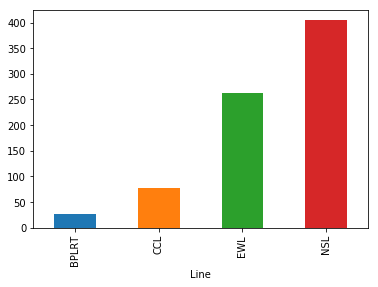

In [28]:
### Which MRT line has the most number of station breakdowns
### ========================================================
#%matplotlib inline
import seaborn
breakStn_df.groupby('Line').Stn.count().plot.bar() 

In [29]:
breakStn_df.groupby('Line').agg({'Stn':'count'}).reset_index().sort_values(['Stn'], ascending=False) 

,Line,Stn
3,NSL,404
2,EWL,263
1,CCL,78
0,BPLRT,27


In [29]:
import folium
from folium import plugins

# Ensure Lat Lon are handed as floats
stations['Lat'] = stations['Lat'].astype(float)
stations['Lon'] = stations['Lon'].astype(float)
stations['count'] = stations['count'].astype(float)

# Setting the base folium map to Singapore
sg_map = folium.Map(location=[1.38, 103.8], zoom_start=12)

# List comprehension to make out list of lists
heat_data = [[row['Lat'],row['Lon']] for index, row in stations.iterrows()]

# Plot it on the map
plugins.HeatMap(heat_data).add_to(sg_map)

# Display the map
sg_map

In [30]:
# mark each station as a point
for index, row in stnlatlon_df.iterrows():
    folium.CircleMarker([row['Lat'], row['Lon']],
                        popup=row['StnName'],
                        radius=3,
                        line_color='#000000',
                        fill_color='#cccccc'
                       ).add_to(sg_map)
    
sg_map